In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/takeenshamloo/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.

U.S. Census Bureau TIGER/Line Shapefiles (Source: U.S. Census Bureau)

Description: The TIGER/Line shapefiles are a spatial dataset provided by the U.S. Census Bureau that includes detailed cartographic and geographic information on various boundaries and infrastructure across the United States. These shapefiles contain lines representing roads, railroads, rivers, and other linear features as well as legal and statistical boundaries, such as those of states, counties, and cities. This data is essential for mapping and spatial analysis tasks, particularly for census and demographic research.

Date Source: U.S. Census Bureau TIGER/Line Documentation

Date of Access: November 9, 2024

NYSDEC Spill Incidents Dataset (Source: New York State Department of Environmental Conservation)

Description: This dataset, maintained by the New York State Department of Environmental Conservation (NYSDEC), records incidents involving spills of petroleum and other hazardous materials within New York State. Each record includes detailed information on the location, type, quantity, and response actions associated with each spill. Spills are reported under state law to prevent and mitigate environmental contamination. Data fields cover spill causes, impacted water bodies, and cleanup statuses. These records aid in understanding environmental risks and regulatory responses to hazardous material incidents.

Date Source: "NYSDEC Spill Incidents Overview" provided in uploaded PDF.

Date of Access: November 9, 2024 

## 3. Import libraries

In [2]:
# Loading packages
import os
import pandas as pd
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [5]:
# Set paths to the data files
spills_path = os.path.join('data', 'Spill_Incidents_20241110.csv') 
counties_path = os.path.join('data', 'tl_2023_us_county','tl_2023_us_county.shp')  

# Import the NY spills data
spills = pd.read_csv(spills_path)

# Import the US counties data as a GeoDataFrame
counties = gpd.read_file(counties_path)

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [7]:
# a. 
# Check the first few rows of spills dataframe
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [8]:
# b. 
# Check the data types of the columns
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [9]:
# c. 
# Check the unique values in the material family column.
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [11]:
# d. 
# Check the unique values in the county column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

In [12]:
# More preliminary steps:

# Check to see missing values in each columns
print(spills.isna().sum())

# Display rows with any missing values
print(spills[spills.isna().any(axis = 1)])

Spill Number                  0
Program Facility Name         6
Street 1                    132
Street 2                 510203
Locality                   1127
County                        0
ZIP Code                 500129
SWIS Code                     0
DEC Region                    0
Spill Date                  151
Received Date               477
Contributing Factor           0
Waterbody                506306
Source                        0
Close Date                11371
Material Name                 0
Material Family               0
Quantity                      0
Units                    110375
Recovered                     0
dtype: int64
        Spill Number   Program Facility Name                   Street 1  \
0             107132                  MH 864         RT 119/MILLWOOD RD   
1             405586               BOWRY BAY         WATER POLL CONTROL   
2             405586               BOWRY BAY         WATER POLL CONTROL   
3             204667              POLE 16091   

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

I found that the spills dataframe includes details about various spill incidents. We have info about spill number, facility name, location, dates, material type, and quantity. The data types are mostly integers and objects. There are four unique values in the material_family column Other, Petroleum, Hazardous Material, and Oxygenates, which shows the main materials involved in spills. In the county column there are entries for many counties and some regions outside New York. Several columns have missing values, especially Street 2, ZIP Code, Waterbody, and Units, indicating that some location or measurement details are not provided.

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [13]:
# a. 
# Convert column names to lowercase and replace spaces with underscores
spills.columns = spills.columns.str.lower().str.replace(' ', '_')


In [14]:
# b. Update column data types
# Convert specified columns to datetime format
spills['spill_date'] = pd.to_datetime(spills['spill_date'], errors='coerce')
spills['received_date'] = pd.to_datetime(spills['received_date'], errors='coerce')
spills['close_date'] = pd.to_datetime(spills['close_date'], errors='coerce')

# Convert specified columns to numeric format
spills['quantity'] = pd.to_numeric(spills['quantity'], errors='coerce')
spills['recovered'] = pd.to_numeric(spills['recovered'], errors='coerce')

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [15]:
# a. 
# Petroleum spills between January 1st, 2023, and October 31st, 2023
petr_23 = spills[
    (spills['material_family'] == 'Petroleum') &
    (spills['spill_date'] >= '2023-01-01') &
    (spills['spill_date'] <= '2023-10-31')
]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [16]:
# b. 
# Verify that all records in petr_23 are from the year 2023 and between January and October
only_2023 = (petr_23['spill_date'].dt.year == 2023).all()
only_jan_to_oct = petr_23['spill_date'].dt.month.between(1, 10).all()
print(f"- Year Check: All records are from 2023 -> {'Yes' if only_2023 else 'No'}")
print(f"- Month Check: All records are from January to October -> {'Yes' if only_jan_to_oct else 'No'}")

- Year Check: All records are from 2023 -> Yes
- Month Check: All records are from January to October -> Yes


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [18]:
# c. 
# All records have 'material_family' set to 'Petroleum'
assert (petr_23['material_family'] == 'Petroleum').all(), "Not all records in are for petroleum spills."

# All records are from the year 2023
assert (petr_23['spill_date'].dt.year == 2023).all(), "Not all records in are from the year 2023."

# All records are between January and October (inclusive)
assert petr_23['spill_date'].dt.month.between(1, 10).all(), "Not all records in are between Jan and Oct 2023."

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [22]:
# Count petroleum spills per county
spills_per_county = (
    petr_23.groupby('county')
    .size()
    .reset_index(name = 'n_spills', drop = False)
)

spills_per_county


,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [23]:
# a. 
# Check geo-dataframe's head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55516 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."


In [25]:
# b. 
# Check the data types of the columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [26]:
# c. 
# Check the coordinate referense system of our dataframe
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

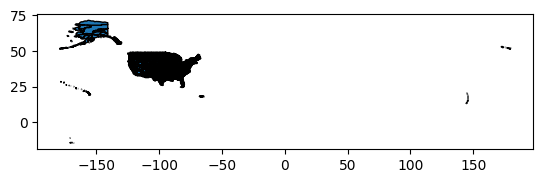

In [28]:
# d. Plot geo-data
counties.plot(edgecolor = "black")

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

Based on the preliminary exploration of the counties GeoDataFrame we found that it contains information about U.S. counties with details like state and county codes, county names, geographic areas (land and water), and coordinates. The data types include mostly categorical objects and integers for areas. The geometry column contains polygon data for each county's boundaries, and the GeoDataFrame uses the NAD83 geographic coordinate reference system (EPSG:4269). This CRS is based on the North American Datum 1983, commonly used for mapping in North America. The plotted map confirms that the data spans the U.S. mainland, along with Alaska, Hawaii, and U.S. territories.

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [32]:
# Simplify column names by converting to lowercase and replacing spaces with underscores
counties.columns = counties.columns.str.lower().str.replace(' ', '_')

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

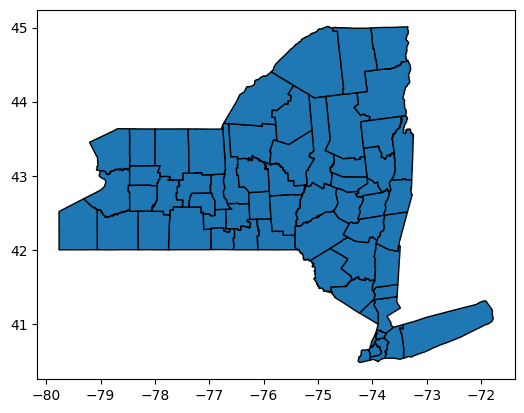

In [33]:
# Select all counties in the state of New York
ny_counties = counties[counties['statefp'] == '36']

# Plot New York
ny_counties.plot(edgecolor="black")

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [ ]:
# a.

In [ ]:
# b.




c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [ ]:
diff_names_spills = ...
diff_names_spills


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [ ]:
diff_names_ny = ...
diff_names_ny




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [ ]:
# e. 


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [ ]:
# Your code here


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [ ]:
# a. Your code here


In [ ]:
# b. Your code here


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [ ]:
# c. Your code here

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



In [ ]:
# a. Your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

*Your answer here*